In [1]:
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data    
import numpy as np
import xarray as xr

#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

#Writing data files
import pandas as pd

In [2]:
#sub domain
min_lon = -100 
min_lat = 35
max_lon = -70
max_lat = 65 

#cropped_ds = ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon)

## Historical yields analysis

In [3]:
# ensemble members
fns='historical_yield_mai_noirr_files.txt'
files=pd.read_csv(fns,header=None)
files[0][0]

'clm45_gfdl-esm2m_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4'

In [4]:
files.size

16

In [5]:
# read ensemble members and calculate ensemble mean
Num=files.size
yields=np.empty((Num,60,60))
yields1996to2005=np.empty((Num,60,60))
i0=0
for fn in files[0]:
    print(fn)
    ds=xr.open_dataset(fn,decode_times=False)
    cropped_ds = ds.sel(lat=slice(max_lat,min_lat),lon=slice(min_lon,max_lon))
    yields[i0]=cropped_ds['yield-mai-noirr'][-20:].mean(dim='time')
    yields1996to2005[i0]=cropped_ds['yield-mai-noirr'][-10:].mean(dim='time')    
    i0=i0+1
mean_yields=np.nanmean(yields,axis=0)
mean_yields1996to2005=np.nanmean(yields1996to2005,axis=0)
std_yields=np.nanstd(yields,axis=0)
print(mean_yields.shape)
print(std_yields.shape)

clm45_gfdl-esm2m_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
clm45_hadgem2-es_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
clm45_ipsl-cm5a-lr_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
clm45_miroc5_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
gepic_gfdl-esm2m_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
gepic_hadgem2-es_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
gepic_ipsl-cm5a-lr_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
gepic_miroc5_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
lpjml_gfdl-esm2m_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
lpjml_hadgem2-es_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
lpjml_ipsl-cm5a-lr_ewembi_historical_2005soc_co2_yield-mai-noirr_global_annual_1861_2005.nc4
l

In [6]:
np.save('mean_yields1996to2005.npy',mean_yields1996to2005)
np.save('mean_yields1986to2005.npy',mean_yields)

In [50]:
ds

<xarray.Dataset>
Dimensions:          (lon: 720, lat: 360, time: 145)
Coordinates:
  * lon              (lon) float32 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * lat              (lat) float32 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * time             (time) float64 200.0 201.0 202.0 ... 342.0 343.0 344.0
Data variables:
    yield-mai-noirr  (time, lat, lon) float32 ...
Attributes:
    CDI:                          Climate Data Interface version 1.8.0 (http:...
    history:                      Created Fri Oct 27 04:16:04 2017 @Eawag By ...
    institution:                  Eawag
    Conventions:                  CF-1.6
    description:                  PEPIC simulated Yield between 1861 and 2005
    contact:                      Wenfeng Liu <wenfeng.liu@eawag.ch> & Hong Y...
    isimip_round:                 ISIMIP2b
    isimip_upload_date:           27. Okt 04:16
    isimip_upload_version:        1
    isimip_qc_version:            1
    CDO:                          Climate Data Operators version 1.8.0 (http:...
    isimip_test_suite_pass_date:  2017.10.27

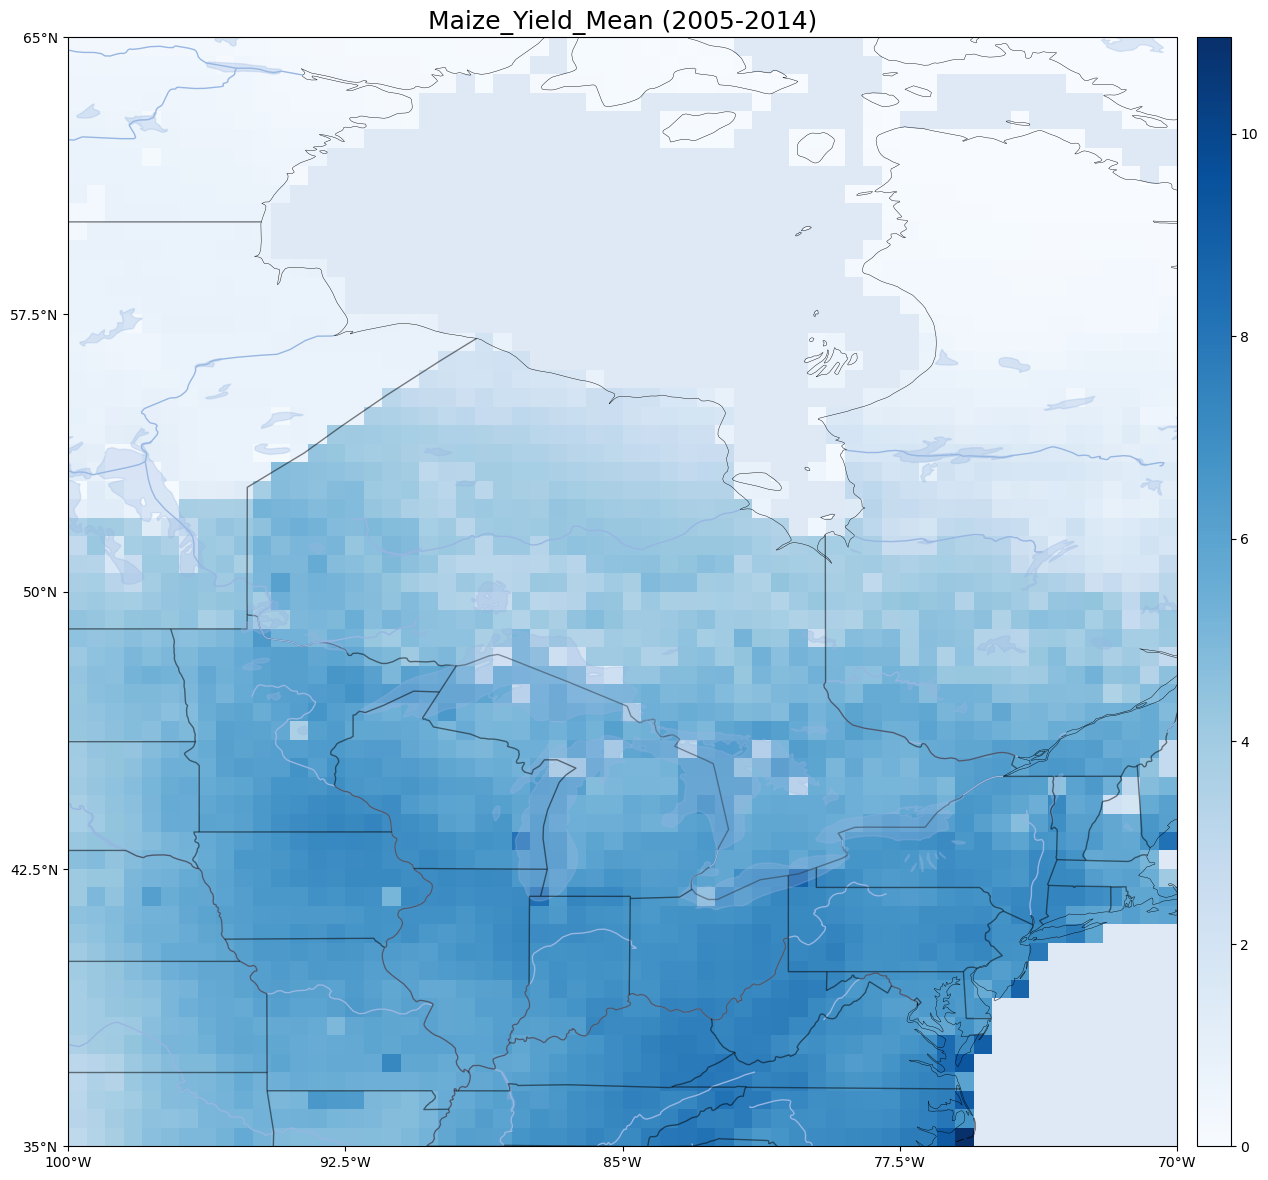

In [51]:
lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_Yield_Mean (2005-2014)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(lons, lats, mean_yields,
                      transform=projection,
                      cmap='Blues'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
#fig.savefig('yieds_projections_figures/Historical_maize_noirr_20_2005-2014_averaged_yield.png',dpi=150)

In [52]:
#np.save('Historical_maize_noirr_20_1986-2006_averaged_yield.npy',mean_yields)

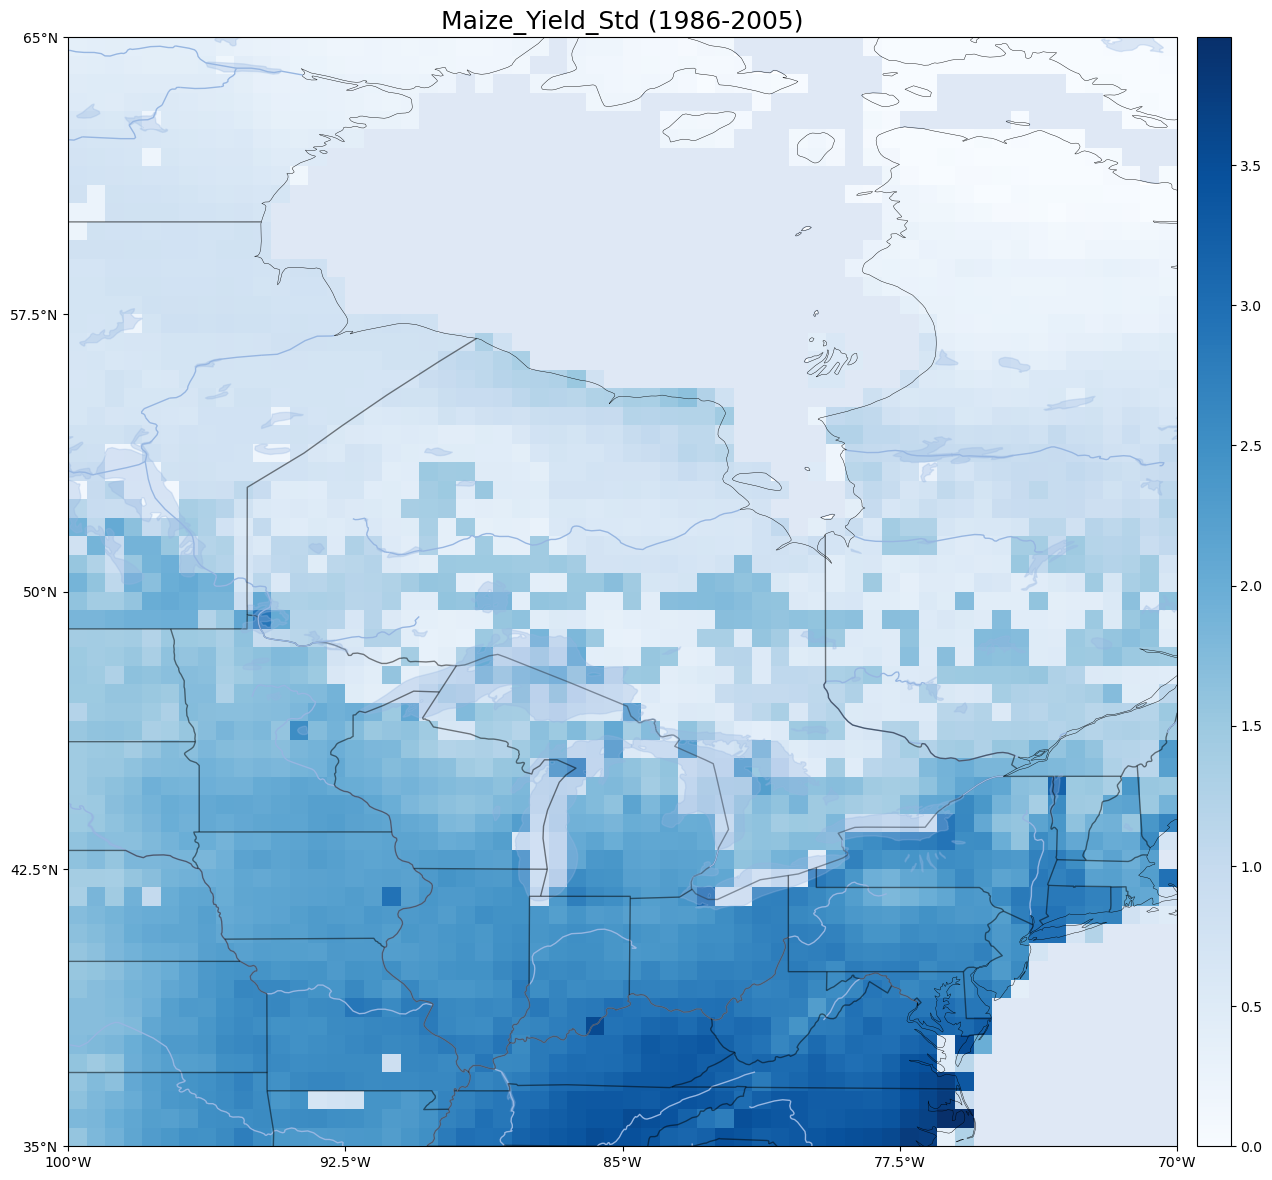

In [53]:
lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_Yield_Std (1986-2005)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(lons, lats, std_yields,
                      transform=projection,
                      cmap='Blues'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
#fig.savefig('yieds_projections_figures/Historical_maize_noirr_20_2005-2014_std_yield.png',dpi=150)

## future yield mean and standard deviation

In [54]:
fns='rcp26_2005soc_co2_yield_mai_noirr.txt'
files=pd.read_csv(fns,header=None)
files[0][0]

'clm45_gfdl-esm2m_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4'

### future period 2040-2069

In [55]:
Num=files.size
yields1=np.empty((Num,60,60))
yields2006to2015_rcp26=np.empty((Num,60,60))
i0=0
for fn in files[0]:
    print(fn)
    ds=xr.open_dataset(fn,decode_times=False)
    cropped_ds = ds.sel(lat=slice(max_lat,min_lat),lon=slice(min_lon,max_lon))
    yields1[i0]=cropped_ds['yield-mai-noirr'][-60:-30].mean(dim='time')
    yields2006to2015_rcp26[i0]=cropped_ds['yield-mai-noirr'][:10].mean(dim='time')    
    i0=i0+1
mean_yields1=np.nanmean(yields1,axis=0)
mean_yields2006to2015_rcp26=np.nanmean(yields2006to2015_rcp26,axis=0)
std_yields1=np.nanstd(yields1,axis=0)
print(mean_yields1.shape)
print(std_yields1.shape)

clm45_gfdl-esm2m_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
clm45_hadgem2-es_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
clm45_ipsl-cm5a-lr_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
clm45_miroc5_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_gfdl-esm2m_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_hadgem2-es_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_ipsl-cm5a-lr_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_miroc5_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_gfdl-esm2m_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_hadgem2-es_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_ipsl-cm5a-lr_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_miroc5_ewembi_rcp26_2005soc_co2_yield-mai-noirr_gl

In [56]:
np.save('mean_yields2006to2015_rcp26.npy',mean_yields2006to2015_rcp26)

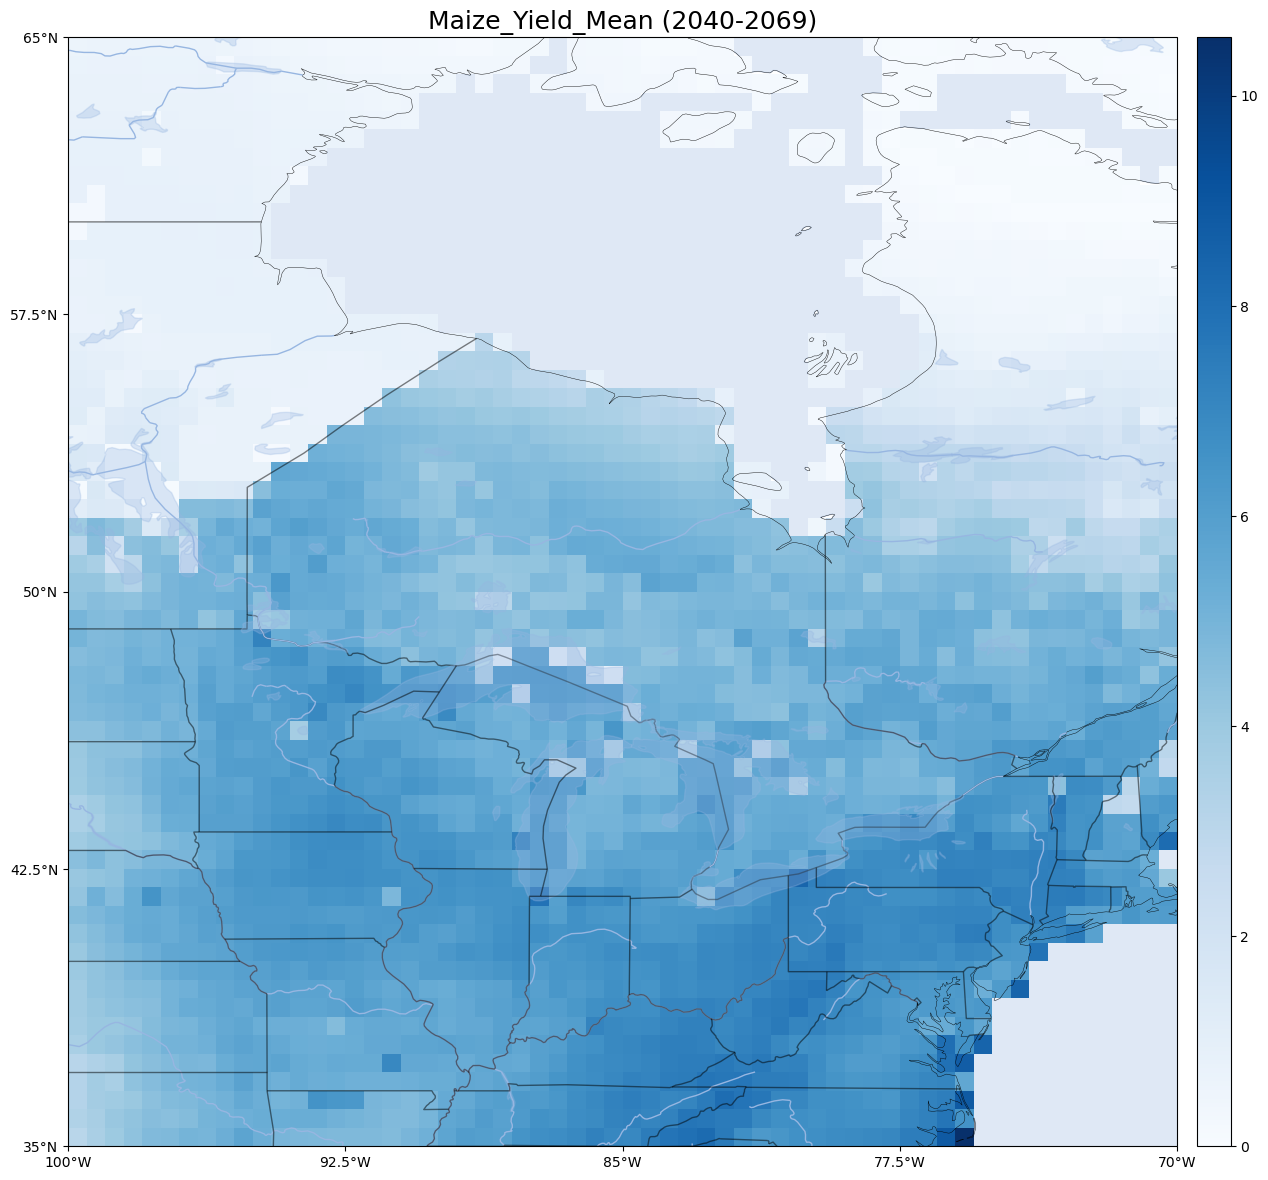

In [57]:
lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_Yield_Mean (2040-2069)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(lons, lats, mean_yields1,
                      transform=projection,
                      cmap='Blues'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/rcp26_2050s_maize_noirr_2040-2069_averaged_yield.png',dpi=150)

In [58]:
np.save('rcp26_2050s_maize_noirr_2040-2069_averaged_yield.npy',mean_yields1)

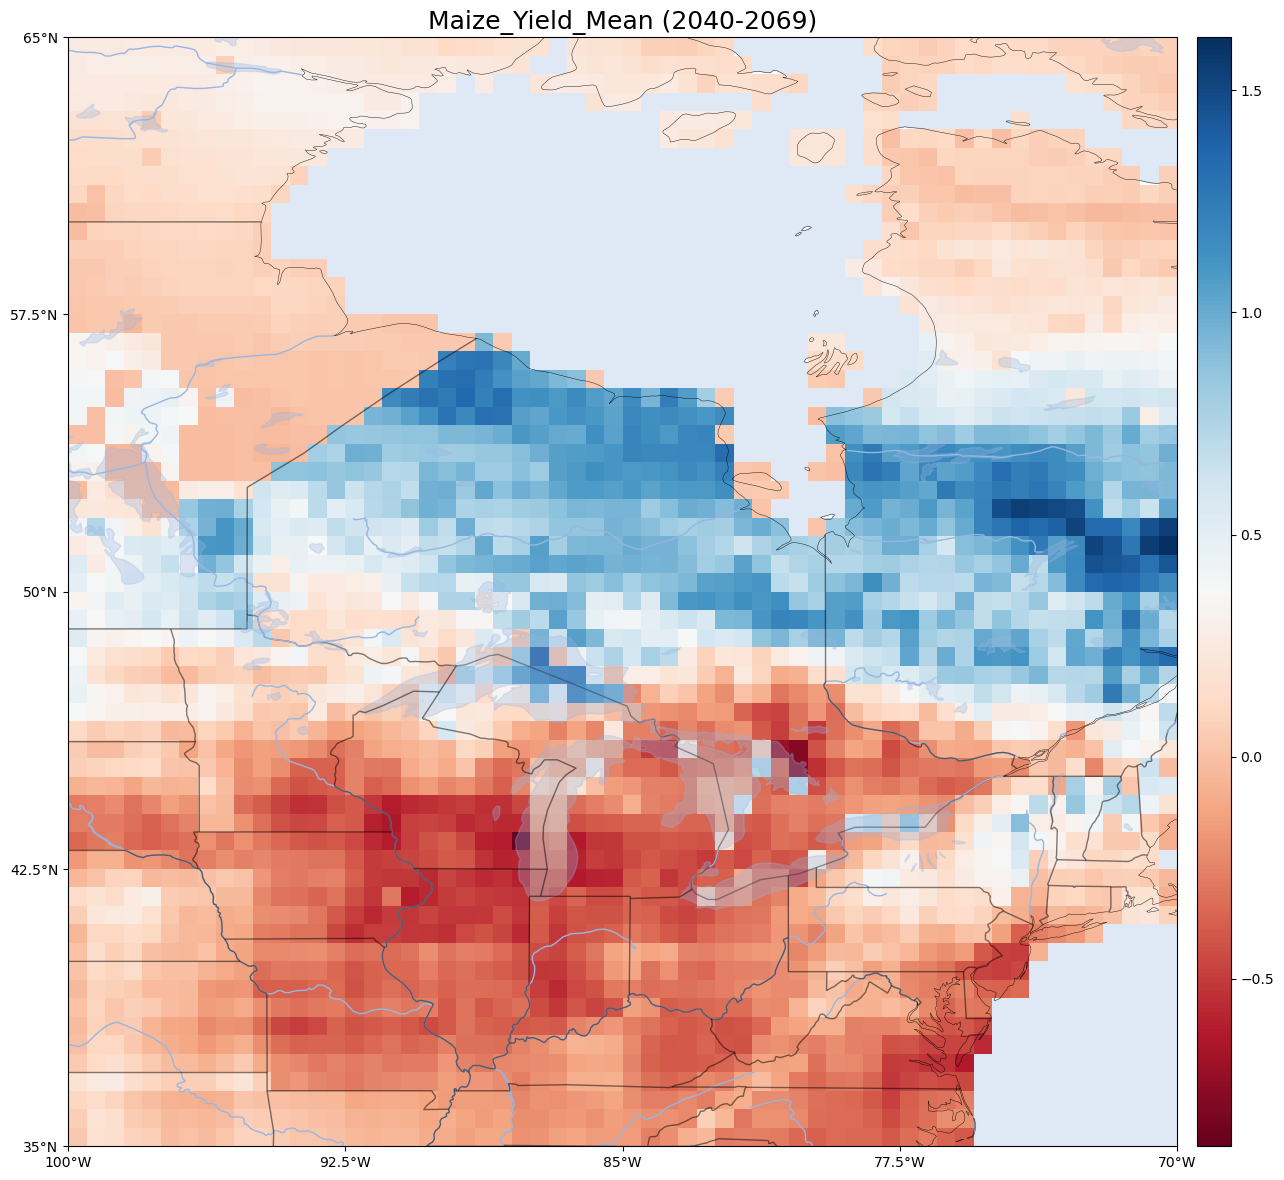

In [59]:
lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_Yield_Mean (2040-2069)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(lons, lats, mean_yields1-mean_yields,
                      transform=projection,
                      cmap='RdBu'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/rcp26_2050s_maize_noirr_20_2040-2069_averaged_yiel_change.png',dpi=150)

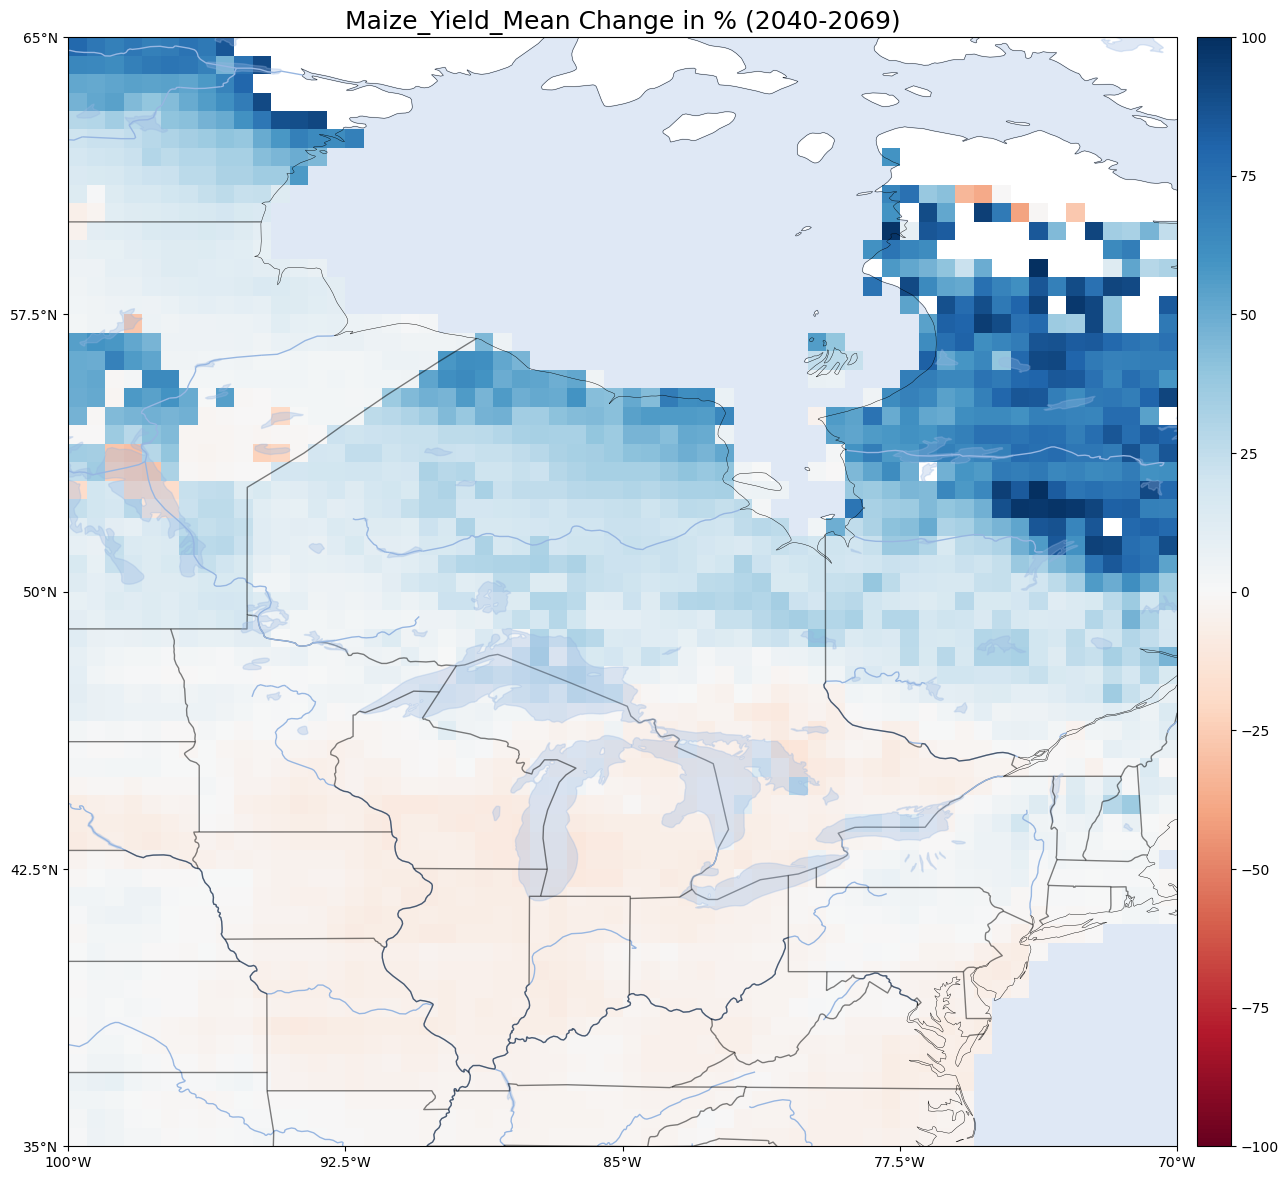

In [60]:
rate=mean_yields1*100/mean_yields-100
rate[rate>100]=np.nan
rate[rate<-60]=np.nan
lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_Yield_Mean Change in % (2040-2069)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(lons, lats, rate,
                      vmin = -100,
                      vmax = 100,
                      transform=projection,
                      cmap='RdBu'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/rcp26_2050s_maize_noirr_20_2040-2069_averaged_yiel_change_percent.png',dpi=150)

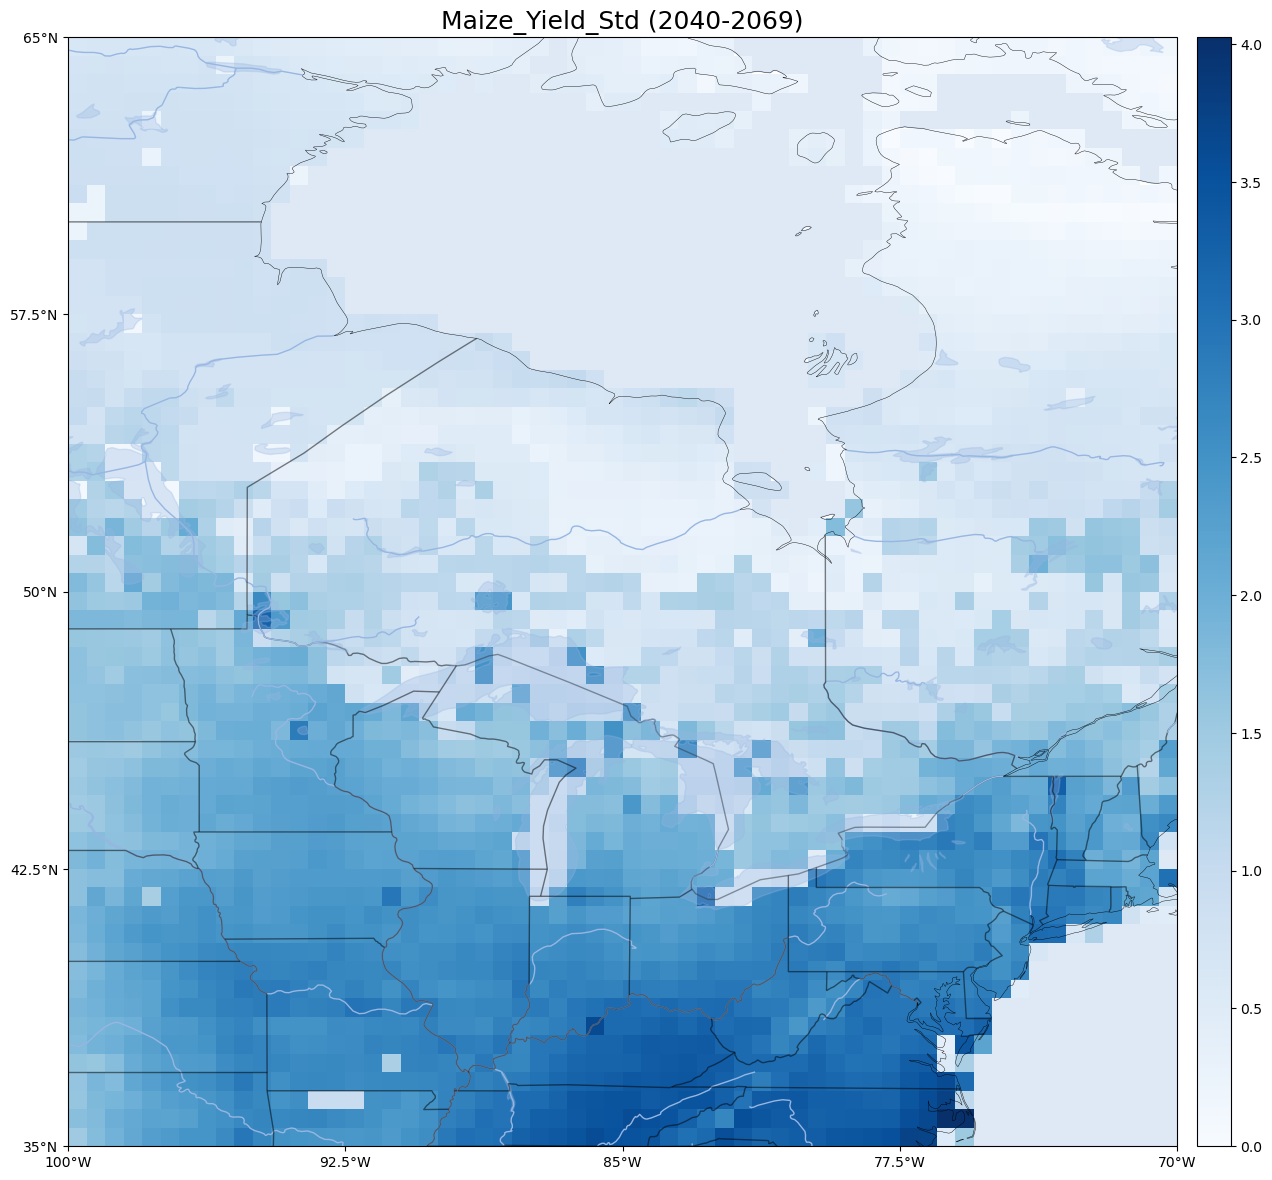

In [61]:
lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_Yield_Std (2040-2069)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(lons, lats, std_yields1,
                      transform=projection,
                      cmap='Blues'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/rcp26_2050s_maize_noirr_2040_2069_std_yield.png',dpi=150)

### future period 2070-2099

In [62]:
Num=files.size
yields2=np.empty((Num,60,60))
i0=0
for fn in files[0]:
    print(fn)
    ds=xr.open_dataset(fn,decode_times=False)
    cropped_ds = ds.sel(lat=slice(max_lat,min_lat),lon=slice(min_lon,max_lon))
    yields2[i0]=cropped_ds['yield-mai-noirr'][-30:].mean(dim='time')
    i0=i0+1
mean_yields2=np.nanmean(yields2,axis=0)
std_yields2=np.nanstd(yields2,axis=0)
print(mean_yields2.shape)
print(std_yields2.shape)

clm45_gfdl-esm2m_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
clm45_hadgem2-es_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
clm45_ipsl-cm5a-lr_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
clm45_miroc5_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_gfdl-esm2m_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_hadgem2-es_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_ipsl-cm5a-lr_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
gepic_miroc5_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_gfdl-esm2m_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_hadgem2-es_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_ipsl-cm5a-lr_ewembi_rcp26_2005soc_co2_yield-mai-noirr_global_annual_2006_2099.nc4
lpjml_miroc5_ewembi_rcp26_2005soc_co2_yield-mai-noirr_gl

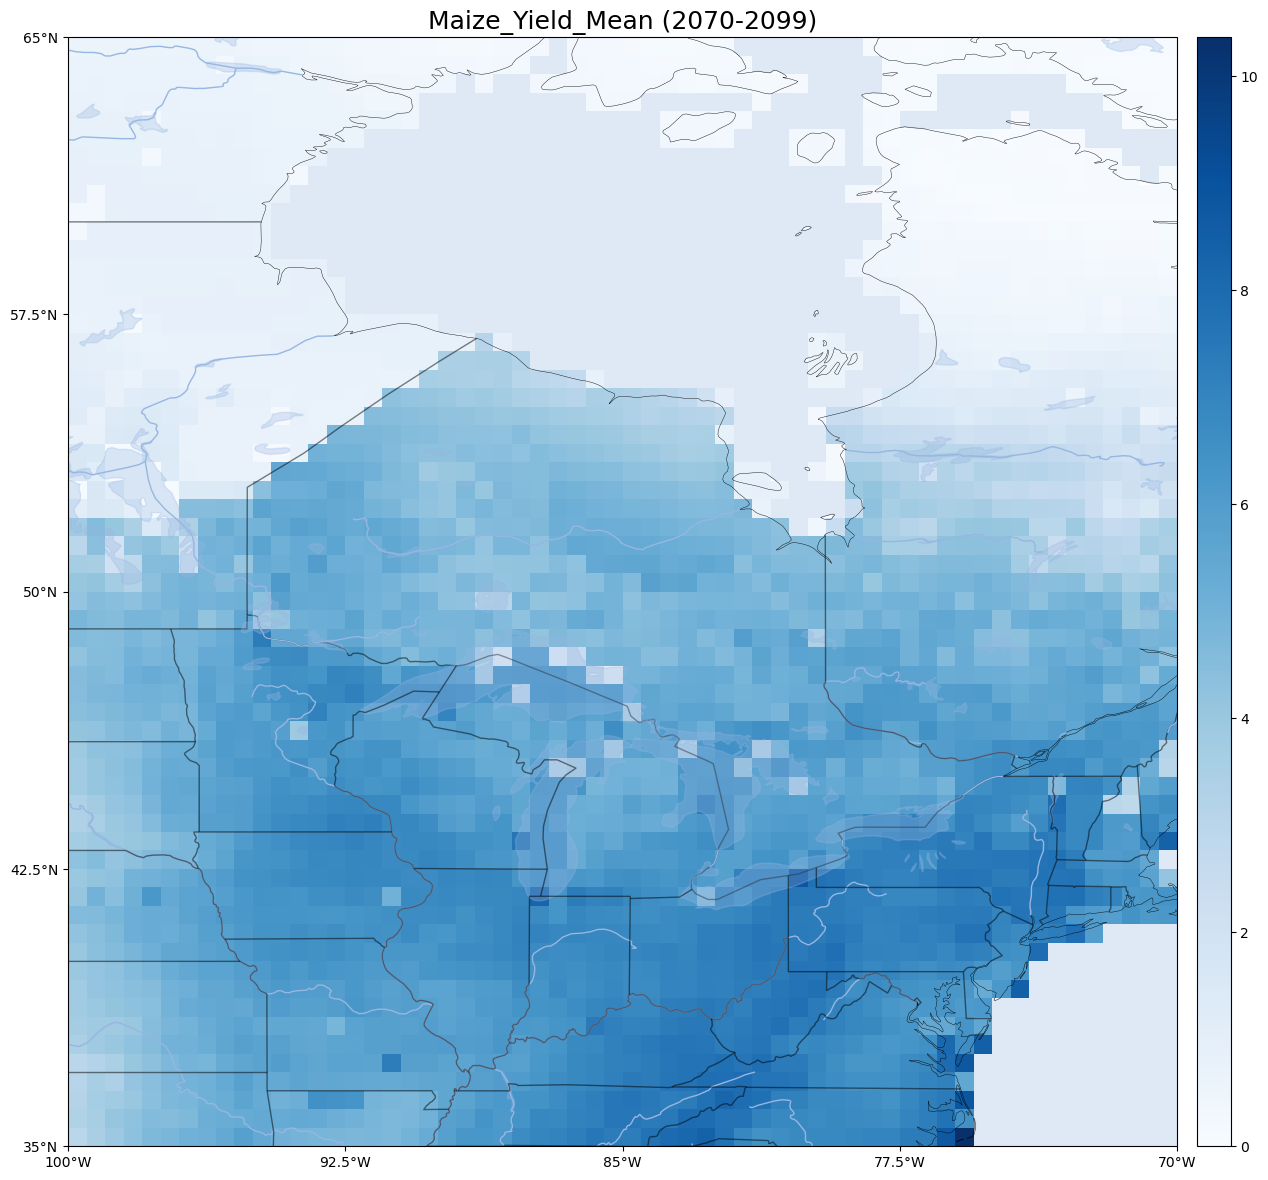

In [63]:
lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_Yield_Mean (2070-2099)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(lons, lats, mean_yields2,
                      transform=projection,
                      cmap='Blues'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/rcp26_2080s_maize_noirr_20_2070-2099_averaged_yield.png',dpi=150)

In [64]:
np.save('rcp26_2080s_maize_noirr_20_2070-2099_averaged_yield.npy',mean_yields2)

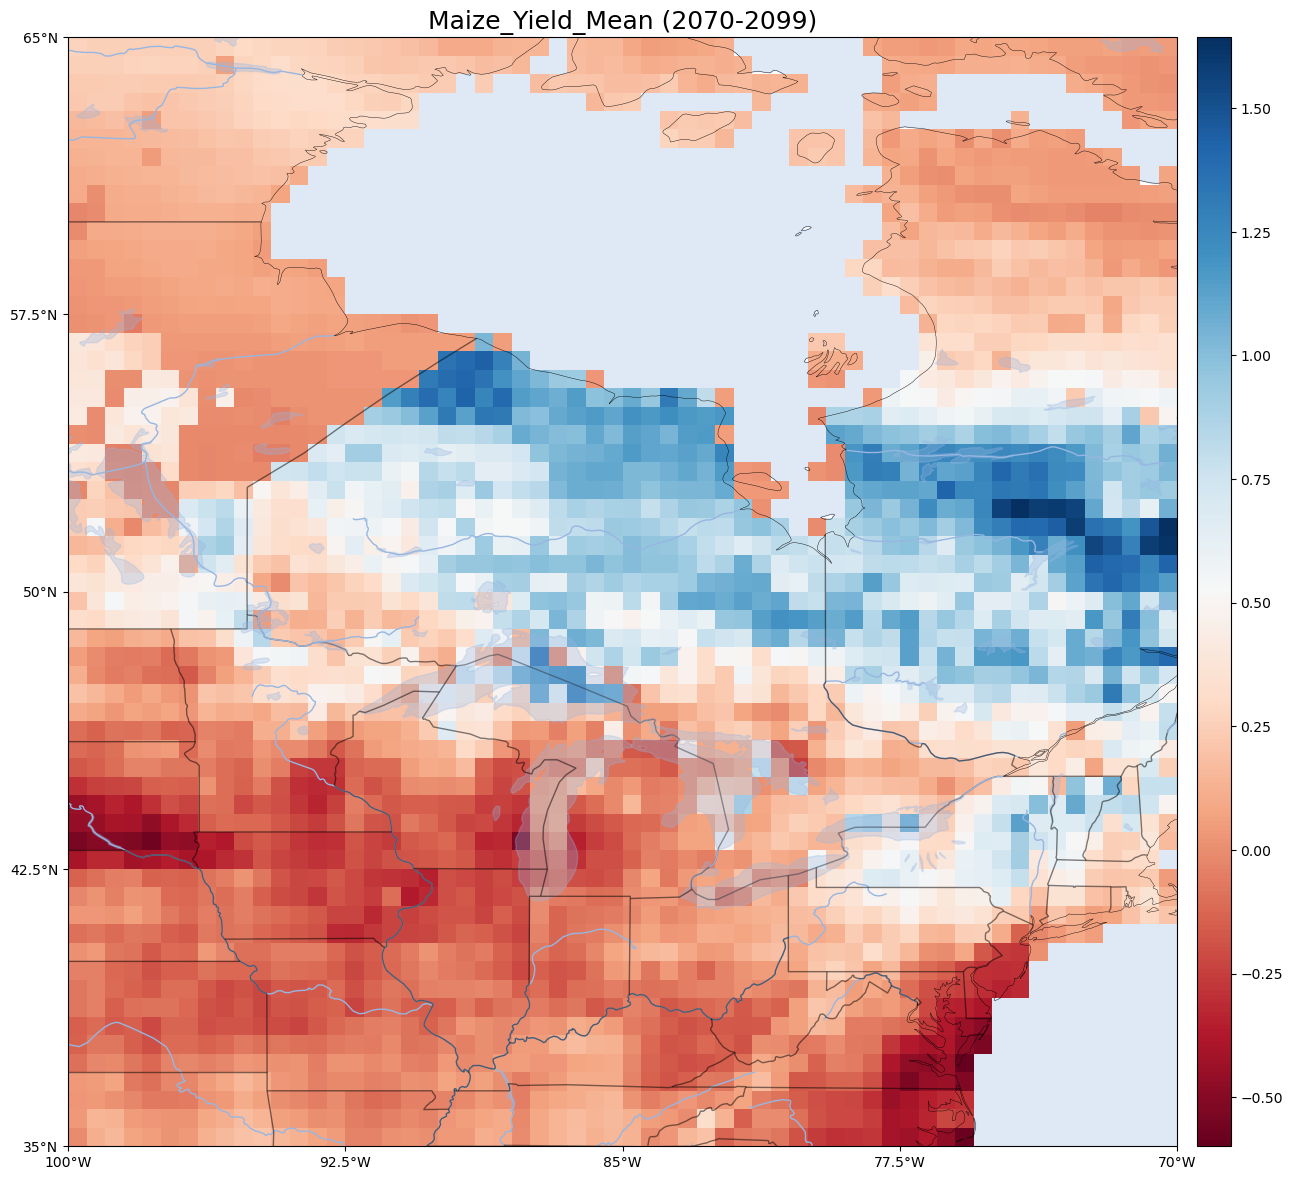

In [65]:
lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_Yield_Mean (2070-2099)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(lons, lats, mean_yields2-mean_yields,
                      transform=projection,
                      cmap='RdBu'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/rcp26_2080s_maize_noirr_20_2070-2099_averaged_yield_change.png',dpi=150)

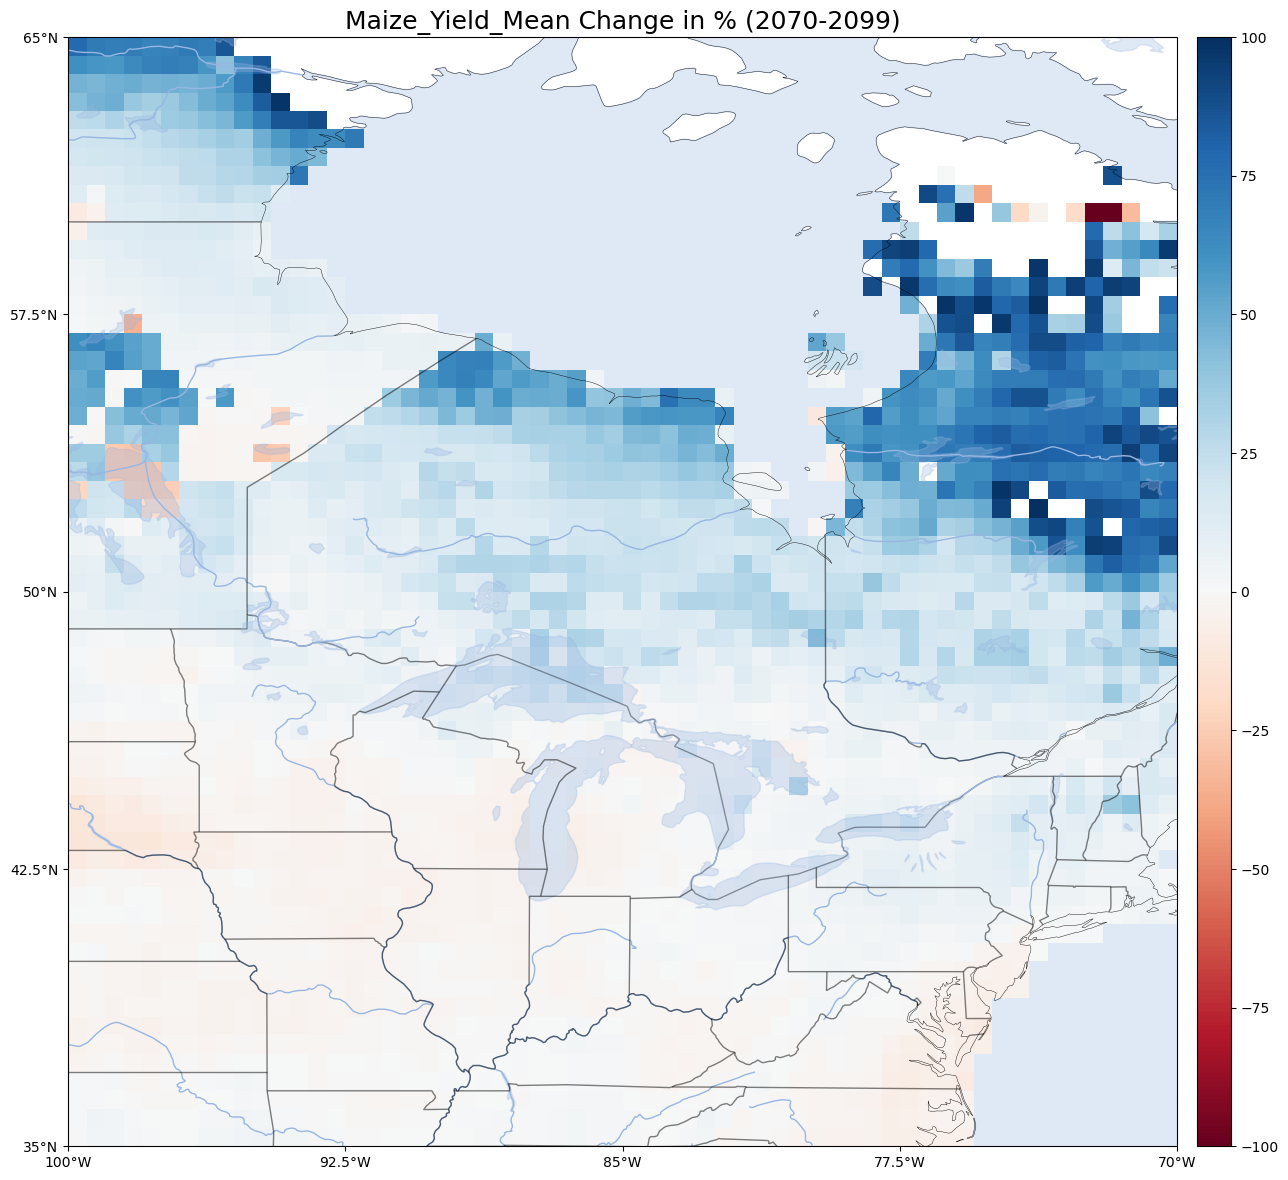

In [66]:
rate=mean_yields2/mean_yields*100-100
rate[rate>100]=np.nan
rate[rate<-100]=np.nan
lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_Yield_Mean Change in % (2070-2099)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(lons, lats, rate,
                      vmin = -100,
                      vmax = 100,
                      transform=projection,
                      cmap='RdBu'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/rcp26_2080s_maize_noirr_20_2070-2099_averaged_yield_change_percent.png',dpi=150)

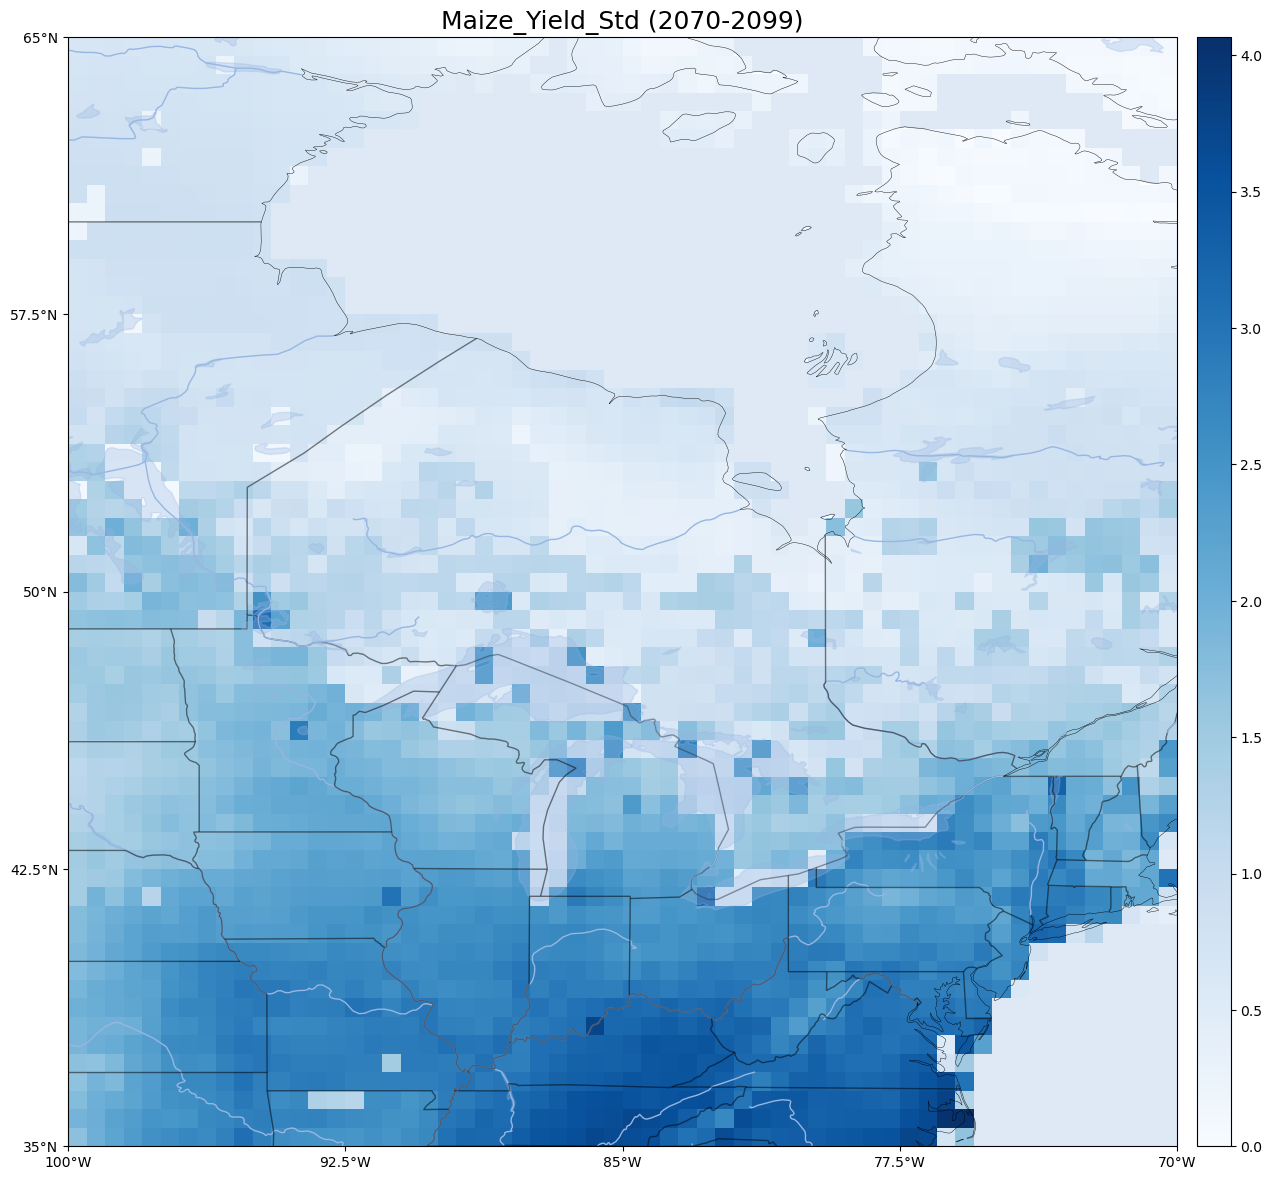

In [67]:
lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

ct_x=[-79.617,-75.717,-86.917,-93.783]
ct_y=[43.667,45.383,49.767,51.067]
ct_n=['Toronto','Ottawa','Geraldton','Red Lake']
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_Yield_Std (2070-2099)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14)
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(lons, lats, std_yields2,
                      transform=projection,
                      cmap='Blues'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/rcp26_maize_noirr_2070_2099_std_yield.png',dpi=150)